In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

In [2]:
phi_data = pd.read_csv("phi_test.csv",skipinitialspace = True)

In [ ]:
phi_data["polar"] = np.arccos(phi_data["phi_z"])
phi_data["rho"] = np.sqrt(phi_data["phi_z"]**2 + phi_data["phi_y"]**2)
phi_data["azimuthal"] = np.sign(phi_data["phi_y"])*np.arccos(phi_data["phi_x"]/phi_data["rho"])
phi_data["pi r1"] = np.pi*phi_data["r1"]
phi_data["2 pi r2"] = 2.*np.pi*phi_data["r2"]

In [ ]:
sns.histplot(data = phi_data, x = "polar", color = "blue")
sns.histplot(data = phi_data, x = "azimuthal", color = "green")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

phi_plot_data = phi_data[phi_data.index % 3 == 0]
x = phi_plot_data['phi_x']
y = phi_plot_data['phi_y']
z = phi_plot_data['phi_z']

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(x, y, z)

plt.show()

# Create analyzer - instantiate class

In [3]:
analyzer = LatticeData()

## Basic statistics

In [4]:
df = analyzer.get_data()

In [5]:
df.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,nMC,ntherm,itheta,beta,length,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,dt
0,0,100.0,-3.507803,-155.512769,-155.512769,-0.824800,6.964259,3.693286,0.480,10000.0,0.0,0.0,1.6,10.0,17,41,41,77,NaN
1,1,100.0,-1.183322,-234.980899,-234.980899,-1.587746,6.964259,3.693286,0.425,10000.0,0.0,0.0,1.6,10.0,17,41,41,77,NaN
2,2,100.0,-5.518374,-284.688510,-284.688510,-5.380676,6.964259,3.693286,0.380,10000.0,0.0,0.0,1.6,10.0,17,41,41,77,NaN
3,3,100.0,0.188157,-320.001736,-320.001736,-9.715618,6.964259,3.693286,0.355,10000.0,0.0,0.0,1.6,10.0,17,41,41,77,NaN
4,4,100.0,-2.155681,-345.995462,-345.995462,-12.525632,6.964259,3.693286,0.316,10000.0,0.0,0.0,1.6,10.0,17,41,41,77,NaN


In [6]:
df["itheta"].unique()

array([0.      , 1.570796, 3.141593, 2.356194, 0.392699, 0.785398])

In [7]:
df_stats = analyzer.do_stats(therm = 0.2)

In [8]:
df_stats

|phi|_mean   Q_L_mean     A_L_mean  \
length itheta   beta nMC     ntherm                                       
10.0   0.000000 1.6  10000.0 0.0          100.0   0.000039  -535.818511   
       0.392699 1.6  10000.0 0.0          100.0   0.000000  -536.112038   
       0.785398 1.6  10000.0 0.0          100.0   0.000000  -536.059309   
       1.570796 1.6  10000.0 0.0          100.0   0.000000  -535.733114   
       2.356194 1.6  10000.0 0.0          100.0   0.000000  -536.263416   
       3.141593 1.6  100.0   0.0          100.0  18.400962  -407.124445   
                     200.0   0.0          100.0  16.908708  -429.652452   
                     1000.0  0.0          100.0  11.995059  -464.598890   
                     10000.0 0.0          100.0   0.047085  -536.352076   
20.0   0.000000 1.6  10000.0 0.0          400.0   0.000043 -2143.524493   
       0.392699 1.6  10000.0 0.0          400.0  -0.000136 -2137.787634   
       0.785398 1.6  10000.0 0.0          400.0  -0.000037 -2141.342946   
       1.570796 1.6  10000.0 0.0          400.0   0.025535 -2139.850268   
       2.356194 1.6  10000.0 0.0          400.0   0.033401 -2137.159009   
       3.141593 1.6  100.0   0.0          400.0  74.139907 -1632.365064   
                     200.0   0.0          400.0  66.440268 -1711.367013   
                     1000.0  0.0          400.0  30.167357 -1937.725639   
                     10000.0 0.0          400.0   1.152577 -2130.632412   
40.0   0.000000 1.6  10000.0 0.0         1600.0  -0.000642 -8560.005178   
       0.392699 1.6  10000.0 0.0         1600.0  -0.000631 -8534.429677   
       0.785398 1.6  10000.0 0.0         1600.0   0.706629 -8548.206952   
       1.570796 1.6  10000.0 0.0         1600.0   2.275786 -8533.218791   
       2.356194 1.6  10000.0 0.0         1600.0   2.921826 -8527.824502   
       3.141593 1.6  10000.0 0.0         1600.0   6.441304 -8513.335278   

                                        S_L_mean   Xi_L_mean  F_LRe_mean  \
length itheta   beta nMC     ntherm                                        
10.0   0.000000 1.6  10000.0 0.0     -535.818511   67.320500    6.964259   
       0.392699 1.6  10000.0 0.0     -536.112038   68.669267    7.581287   
       0.785398 1.6  10000.0 0.0     -536.059309   69.855486    5.722368   
       1.570796 1.6  10000.0 0.0     -535.733114   68.771278    3.009414   
       2.356194 1.6  10000.0 0.0     -536.263416   68.720890    2.595148   
       3.141593 1.6  100.0   0.0     -464.932772   19.430862    4.415365   
                     200.0   0.0     -482.772725   24.948399    4.415365   
                     1000.0  0.0     -502.282480   25.488564    4.415365   
                     10000.0 0.0     -536.499997   69.143087    4.415365   
20.0   0.000000 1.6  10000.0 0.0    -2143.524493  257.373011  -10.451628   
       0.392699 1.6  10000.0 0.0    -2137.787580  253.464625   -8.477229   
       0.785398 1.6  10000.0 0.0    -2141.342917  254.816053   -6.483556   
       1.570796 1.6  10000.0 0.0    -2139.890379  247.612797   -4.911029   
       2.356194 1.6  10000.0 0.0    -2137.237707  242.719061   -4.629648   
       3.141593 1.6  100.0   0.0    -1865.282451   25.115413   -0.668602   
                     200.0   0.0    -1920.095272   39.128711   -0.668602   
                     1000.0  0.0    -2032.499185   71.385769   -0.668602   
                     10000.0 0.0    -2134.253339  240.651558   -0.668602   
40.0   0.000000 1.6  10000.0 0.0    -8560.005178  844.570543  -21.588948   
       0.392699 1.6  10000.0 0.0    -8534.429429  345.818474  -19.811708   
       0.785398 1.6  10000.0 0.0    -8548.761937  618.684312  -22.292762   
       1.570796 1.6  10000.0 0.0    -8536.793588  634.997235  -10.987296   
       2.356194 1.6  10000.0 0.0    -8534.708892  623.500466   -9.279060   
       3.141593 1.6  10000.0 0.0    -8533.571233  759.226252   -5.745333   

                                     F_LIm_mean  acc_mean  Q_L_ta  A_L_ta  \
length itheta   beta nMC     nth

# Observable plots

In [9]:
itheta = 0.5*np.pi
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
plot_params = {"beta": beta, "nMC": nMC}#,"itheta": itheta, "length": length, "ntherm": ntherm}

In [10]:
df_stats = analyzer.do_stats(therm = 0.4,filtered = True, **plot_params)

beta 1.6
nMC 10000


In [11]:
df_stats.columns

Index(['|phi|_mean', 'Q_L_mean', 'A_L_mean', 'S_L_mean', 'Xi_L_mean',
       'F_LRe_mean', 'F_LIm_mean', 'acc_mean', 'Q_L_ta', 'A_L_ta', 'S_L_ta',
       'Xi_L_ta', '|phi|_std', 'Q_L_std', 'A_L_std', 'S_L_std', 'Xi_L_std',
       'F_LRe_std', 'F_LIm_std', 'acc_std', 'time (sec)', 'time (min)',
       'time (hr)'],
      dtype='object')

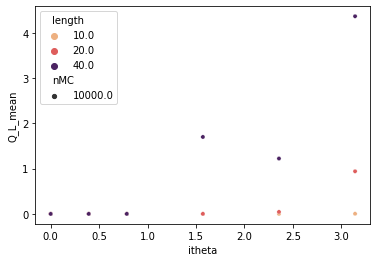

In [12]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Q_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

In [13]:
plot_data = analyzer.get_data(filtered = True, **plot_params)
plot_data.head()

beta 1.6
nMC 10000


,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,nMC,ntherm,itheta,beta,length,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,dt
0,0,100.0,-3.507803,-155.512769,-155.512769,-0.824800,6.964259,3.693286,0.480,10000.0,0.0,0.0,1.6,10.0,17,41,41,77,NaN
1,1,100.0,-1.183322,-234.980899,-234.980899,-1.587746,6.964259,3.693286,0.425,10000.0,0.0,0.0,1.6,10.0,17,41,41,77,NaN
2,2,100.0,-5.518374,-284.688510,-284.688510,-5.380676,6.964259,3.693286,0.380,10000.0,0.0,0.0,1.6,10.0,17,41,41,77,NaN
3,3,100.0,0.188157,-320.001736,-320.001736,-9.715618,6.964259,3.693286,0.355,10000.0,0.0,0.0,1.6,10.0,17,41,41,77,NaN
4,4,100.0,-2.155681,-345.995462,-345.995462,-12.525632,6.964259,3.693286,0.316,10000.0,0.0,0.0,1.6,10.0,17,41,41,77,NaN


In [14]:
plot_data["Q_L/L^2"] = plot_data["Q_L"]/(plot_data["length"]**2)

In [15]:
plot_data = plot_data[plot_data["step"]>2000]

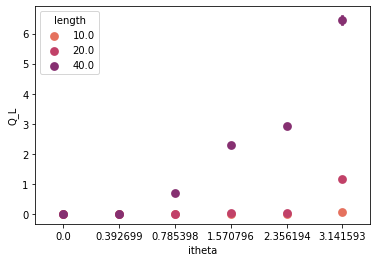

In [16]:
sns.pointplot(data = plot_data, x = "itheta", y = plot_data["Q_L"], hue = "length", 
              errorbar="se", linestyles = "None", palette = analyzer.palette)
plt.show()

In [17]:
itheta = 0.5*np.pi
beta = 1.6
length = 20
nMC = 10000
ntherm = 0
clength_params = {"beta": beta, "nMC": nMC,"itheta": itheta, "length": length, "ntherm": ntherm}

In [18]:
clength_df = analyzer.do_stats(therm = 0.2,filtered = True, **clength_params)

beta 1.6
nMC 10000
itheta 1.5707963267948966
length 20
ntherm 0


In [23]:
clength_df

,,,,,|phi|_mean,Q_L_mean,A_L_mean,S_L_mean,Xi_L_mean,F_LRe_mean,F_LIm_mean,acc_mean,Q_L_ta,A_L_ta,...,Q_L_std,A_L_std,S_L_std,Xi_L_std,F_LRe_std,F_LIm_std,acc_std,time (sec),time (min),time (hr)
length,itheta,beta,nMC,ntherm,,,,,,,,,,,,,,,,,,,,,
20.0,1.570796,1.6,10000.0,0.0,400.0,0.025535,-2139.850268,-2139.890379,247.612797,-4.911029,-7.799084,0.087518,1212.0,197.0,...,0.305098,21.222842,21.165553,62.135422,0.0,0.0,0.00075,NaN,NaN,NaN


In [26]:
Xi = clength_df["Xi_L_mean"]

In [28]:
Xi = Xi.iloc[0]

In [29]:
clength = analyzer.calc_corr_length(Xi, **clength_params)

nMC 10000
ntherm 0
itheta 1.570796
beta 1.6
length 20
L = 20


In [30]:
clength

(33.90877271862226+4.309649654537352j)

In [31]:
mass_gap = 1./clength

In [33]:
mass_gap

(0.029022092374531766-0.0036885749718438597j)